In [8]:
import autograd.numpy as np  
import matplotlib.pyplot as plt
from autograd import grad, hessian

In [31]:
b = 1.41

def f_x(X): 
    return X[0]**2 + b * X[0] * X[1] + X[1]**2 + b * X[1] * X[2] + X[2]**2

grad_func_auto = grad(f_x)
hessian_func_auto = hessian(f_x)
def grad_func(x):
    return grad_func_auto(x)

def hessian_func(x):
    return hessian_func_auto(x)
# descent du gradient à pas fixe
def gradient_descent_fixed_step(f, grad_f, x0, learning_rate=0.01, max_iter=1000, tol=1e-6):
    x = x0
    path = [x.copy()]  
    for i in range(max_iter):
        gradient = grad_f(x)
        x_new = x - learning_rate * gradient
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
    return path

In [20]:
def gradient_descent_variable_step(f, grad_f, x0, initial_lr=0.1, decay_rate=0.8, max_iter=1000, tol=1e-6):
    x = x0
    path = [x.copy()]  
    learning_rate = initial_lr
    for i in range(max_iter):
        gradient = grad_f(x)
        x_new = x - learning_rate * gradient
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
        learning_rate *= decay_rate  
    return path

In [21]:
def newtons_method(f, grad_f, hessian_f, x0, max_iter=100, tol=1e-6):
    x = x0
    path = [x.copy()]  # Enregistrement du chemin
    for i in range(max_iter):
        gradient = grad_f(x)
        hessian = hessian_f(x)
        if np.linalg.norm(gradient) < tol:
            break
        x_new = x - np.linalg.inv(hessian) @ gradient
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
    return path

In [22]:
def quasi_newtons_method(f, grad_f, x0, max_iter=100, tol=1e-6):
    x = x0
    n = len(x0)
    H = np.eye(n)  # Matrice d'identité initiale comme approximation de la Hessienne
    path = [x.copy()]  # Enregistrement du chemin
    for i in range(max_iter):
        gradient = grad_f(x)
        if np.linalg.norm(gradient) < tol:
            break
        p = -H @ gradient
        x_new = x + p
        s = x_new - x
        y = grad_f(x_new) - gradient
        rho = 1.0 / (y @ s)
        H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)
        x = x_new
        path.append(x.copy())
    return path

In [23]:
def nesterov_accelerated_gradient(f, grad_f, x0, learning_rate=0.01, momentum=0.9, max_iter=1000, tol=1e-6):
    x = x0
    v = np.zeros_like(x0)  # Initialiser la vitesse à zéro
    path = [x.copy()]  # Enregistrement du chemin
    for i in range(max_iter):
        x_ahead = x - momentum * v  # Calculer le point "anticipé"
        gradient = grad_f(x_ahead)
        v = momentum * v + learning_rate * gradient
        x_new = x - v
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
    return path


In [24]:
def plot_convergence_2d(paths):
    """Affiche les chemins de convergence pour chaque méthode d'optimisation en 2D avec des lignes de niveau."""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Créer un espace 2D pour visualiser les trajectoires
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + 1.41*X*Y + Y**2  # Fonction en 2D dans l’espace x-y

    # Contours de niveau
    contour = ax.contour(X, Y, Z, levels=20, cmap="viridis")
    ax.clabel(contour, inline=True, fontsize=8)

    # Ajouter les trajectoires de chaque méthode
    for method, path in paths.items():
        x_vals = [p[0] for p in path]
        y_vals = [p[1] for p in path]
        ax.plot(x_vals, y_vals, marker='o', linestyle='-', label=method)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title("Convergence Paths of Different Optimization Methods (2D Contour Plot)")
    plt.show()

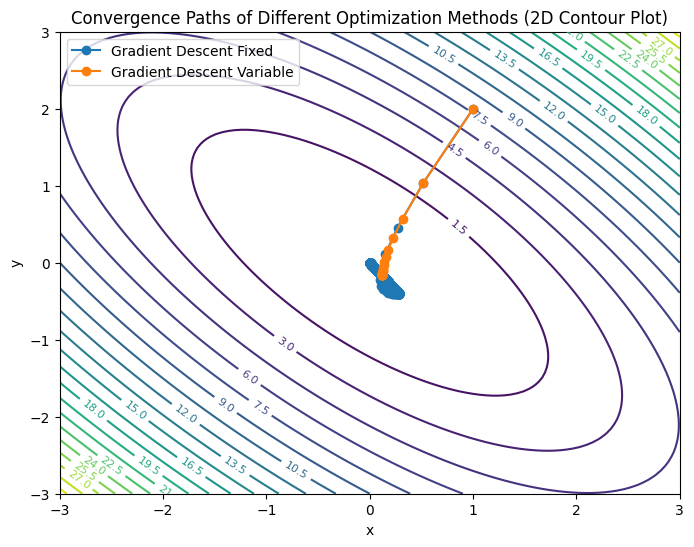

In [32]:
x0 = np.array([1.0, 2.0, 3.0])
learning_rate = 0.1
max_iter = 100000
# beta = 1.41
# beta = 0.11
alpha = 0.1
maxIter = 10000
paths = {
    'Gradient Descent Fixed': gradient_descent_fixed_step(f_x, grad_func_auto, x0, learning_rate, max_iter),
    'Gradient Descent Variable': gradient_descent_variable_step(f_x, grad_func_auto, x0, learning_rate, max_iter=max_iter),
    # 'Newton\'s Method': newtons_method(f_x, grad_func_auto, hessian_func_auto, x0, max_iter=max_iter),
    # 'Quasi-Newton (BFGS)': quasi_newtons_method(f_x, grad_func_auto, x0, max_iter=max_iter),
    # 'Nesterov Accelerated Gradient': nesterov_accelerated_gradient(f_x, grad_func_auto, x0, learning_rate, max_iter=max_iter)
}
plot_convergence_2d(paths)


In [16]:
def linear_search(beta):
    r=1
    xn=np.array([1,1,1])
    phi0 = f_x(xn, beta)
    while True:
        phir = f_x(xn-r*calcule_gradient(xn,beta), beta)
        phi2r = f_x(xn-2*r*calcule_gradient(xn,beta), beta)
        if phi0 > phir and phir>phi2r : 
            break
        r = r /2
    taux = 2*r
    while True:
        phi_taux_r = f_x(xn-(r+taux)*calcule_gradient(xn,beta), beta)
        phi_taux = f_x(xn-(taux)*calcule_gradient(xn,beta), beta)
        if phi_taux_r >= phi_taux : 
            break
        taux = taux+r
    return taux



def calculate_gradient_descent_var(X, beta, alpha, maxIter):
    a = alpha
    theta = np.array(X)
    for _ in range(maxIter): 
        a = linear_search(a)
        theta = theta - calcule_gradient(theta, beta) * alpha
    return theta
X = [1.0, 2.0, 3.0]  
beta = 0.11
alpha = 0.1
maxIter = 10000

result = calculate_gradient_descent_var(X, beta, alpha, maxIter)
print(result)

[ 1.e-323 -1.e-323  1.e-323]


In [17]:
def calcule_hessien(X, beta):
    return np.array([
        [2, beta, 0],
        [beta, 2, beta],
        [0, beta, 2]
    ])

def calculate_newton_descent(X, beta, maxIter):
    theta = np.array(X)
    for _ in range(maxIter): 
        grad = calcule_gradient(theta, beta)
        hessien = calcule_hessien(theta, beta)
        try:
            hessien_inv = np.linalg.inv(hessien)
        except np.linalg.LinAlgError:
            print("Le hessien est singulier et ne peut pas être inversé.")
            break
        step = hessien_inv.dot(grad)
        theta = theta - step
    return theta

X = [1.0, 2.0, 3.0]  
beta = 0.11
maxIter = 10000

result = calculate_newton_descent(X, beta, maxIter)
print("Résultat avec méthode de Newton :", result)

Résultat avec méthode de Newton : [0. 0. 0.]


## mery

[[ 1.00000000e+000  2.00000000e+000  3.00000000e+000]
 [-1.10000000e-001 -2.20000000e-001 -1.10000000e-001]
 [ 1.21000000e-002  1.21000000e-002  1.21000000e-002]
 [-6.65500000e-004 -1.33100000e-003 -6.65500000e-004]
 [ 7.32050000e-005  7.32050000e-005  7.32050000e-005]
 [-4.02627500e-006 -8.05255000e-006 -4.02627500e-006]
 [ 4.42890250e-007  4.42890250e-007  4.42890250e-007]
 [-2.43589638e-008 -4.87179275e-008 -2.43589638e-008]
 [ 2.67948601e-009  2.67948601e-009  2.67948601e-009]
 [-1.47371731e-010 -2.94743461e-010 -1.47371731e-010]
 [ 1.62108904e-011  1.62108904e-011  1.62108904e-011]
 [-8.91598971e-013 -1.78319794e-012 -8.91598971e-013]
 [ 9.80758868e-014  9.80758868e-014  9.80758868e-014]
 [-5.39417377e-015 -1.07883475e-014 -5.39417377e-015]
 [ 5.93359115e-016  5.93359115e-016  5.93359115e-016]
 [-3.26347513e-017 -6.52695026e-017 -3.26347513e-017]
 [ 3.58982265e-018  3.58982265e-018  3.58982265e-018]
 [-1.97440246e-019 -3.94880491e-019 -1.97440246e-019]
 [ 2.17184270e-020  2.171842

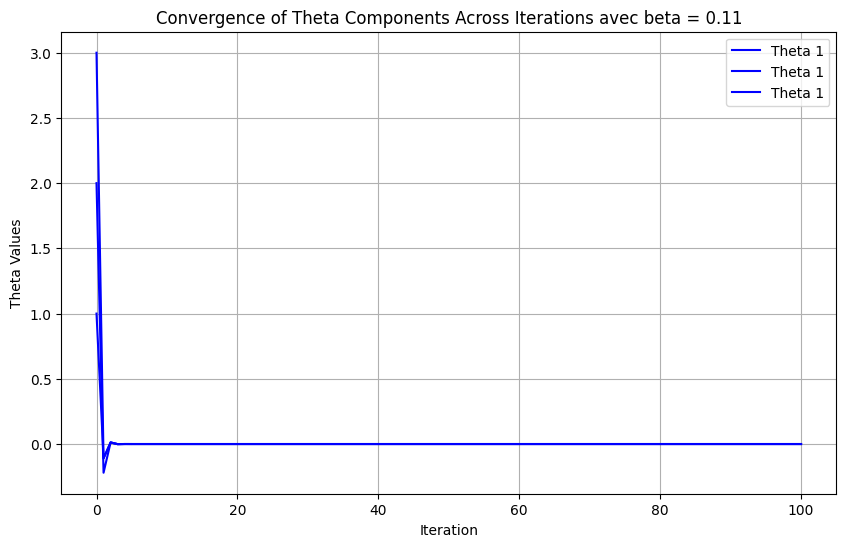

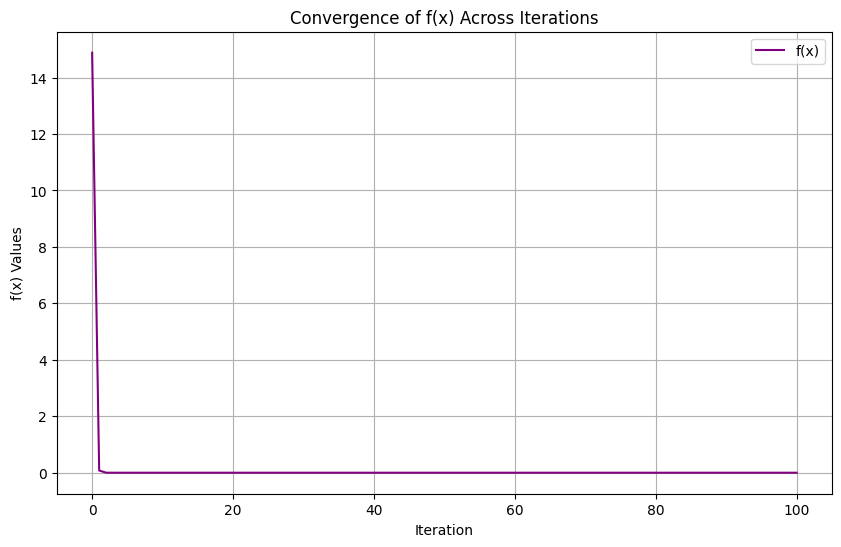

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def linear_search(beta):
    r = 1
    xn = np.array([1, 1, 1])
    phi0 = f_x(xn, beta)
    while True:
        phir = f_x(xn - r * calcule_gradient(xn, beta), beta)
        phi2r = f_x(xn - 2 * r * calcule_gradient(xn, beta), beta)
        if phi0 > phir and phir > phi2r:
            break
        r /= 2
    taux = 2 * r
    while True:
        phi_taux_r = f_x(xn - (r + taux) * calcule_gradient(xn, beta), beta)
        phi_taux = f_x(xn - taux * calcule_gradient(xn, beta), beta)
        if phi_taux_r >= phi_taux:
            break
        taux += r
    return taux

def calculate_gradient_descent_var(X, beta, alpha, maxIter):
    a = alpha
    theta = np.array(X)
    thetas = [theta.copy()]  # Store initial theta

    for _ in range(maxIter): 
        a = linear_search(a)
        theta = theta - calcule_gradient(theta, beta) * alpha
        thetas.append(theta.copy())  # Store each theta

    return theta, thetas

# Initial parameters
X = [1.0, 2.0, 3.0]
beta = 0.11
alpha = 0.5
maxIter = 100

# Run gradient descent
result, thetas = calculate_gradient_descent_var(X, beta, alpha, maxIter)

# Convert list of thetas to numpy array for plotting
thetas = np.array(thetas)
print(thetas)

# Plotting theta components against iteration count
iterations = np.arange(len(thetas))

plt.figure(figsize=(10, 6))

# Plot each component of theta across iterations
plt.plot(iterations, thetas, label="Theta 1", color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Theta Values")
plt.title("Convergence of Theta Components Across Iterations avec beta = 0.11")
plt.legend()
plt.grid(True)

plt.show()

# Calculate f(x) for each theta in thetas
fx_values = [f_x(theta, beta) for theta in thetas]

# Plotting f(x) values against iteration count
plt.figure(figsize=(10, 6))

# Plot f(x) convergence
plt.plot(iterations, fx_values, label="f(x)", color='purple')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("f(x) Values")
plt.title("Convergence of f(x) Across Iterations")
plt.legend()
plt.grid(True)

plt.show()

[[ 1.00000000e+000  2.00000000e+000  3.00000000e+000]
 [-1.10000000e-001 -2.20000000e-001 -1.10000000e-001]
 [ 1.21000000e-002  1.21000000e-002  1.21000000e-002]
 [-6.65500000e-004 -1.33100000e-003 -6.65500000e-004]
 [ 7.32050000e-005  7.32050000e-005  7.32050000e-005]
 [-4.02627500e-006 -8.05255000e-006 -4.02627500e-006]
 [ 4.42890250e-007  4.42890250e-007  4.42890250e-007]
 [-2.43589638e-008 -4.87179275e-008 -2.43589638e-008]
 [ 2.67948601e-009  2.67948601e-009  2.67948601e-009]
 [-1.47371731e-010 -2.94743461e-010 -1.47371731e-010]
 [ 1.62108904e-011  1.62108904e-011  1.62108904e-011]
 [-8.91598971e-013 -1.78319794e-012 -8.91598971e-013]
 [ 9.80758868e-014  9.80758868e-014  9.80758868e-014]
 [-5.39417377e-015 -1.07883475e-014 -5.39417377e-015]
 [ 5.93359115e-016  5.93359115e-016  5.93359115e-016]
 [-3.26347513e-017 -6.52695026e-017 -3.26347513e-017]
 [ 3.58982265e-018  3.58982265e-018  3.58982265e-018]
 [-1.97440246e-019 -3.94880491e-019 -1.97440246e-019]
 [ 2.17184270e-020  2.171842

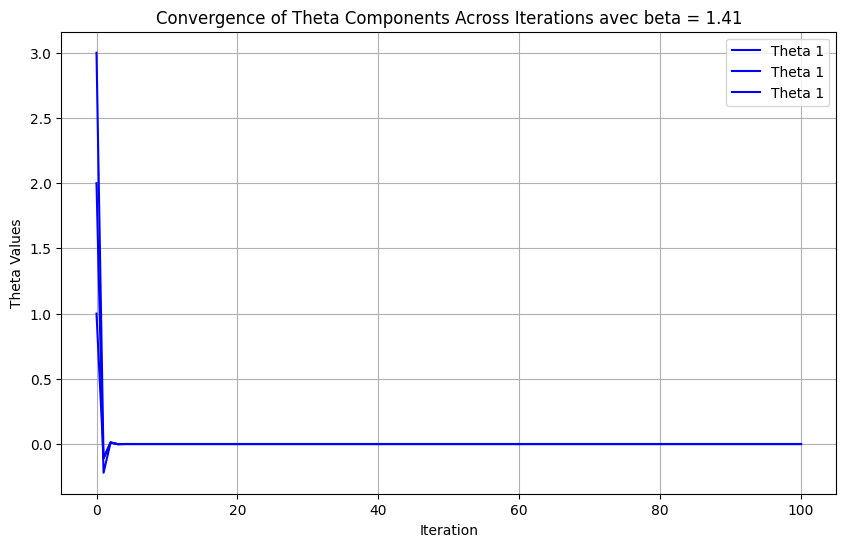

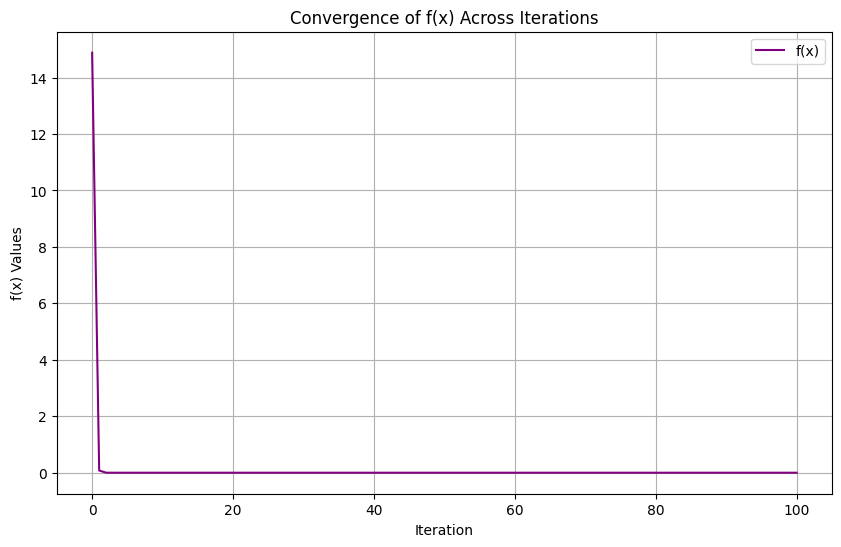

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def linear_search(beta):
    r = 1
    xn = np.array([1, 1, 1])
    phi0 = f_x(xn, beta)
    while True:
        phir = f_x(xn - r * calcule_gradient(xn, beta), beta)
        phi2r = f_x(xn - 2 * r * calcule_gradient(xn, beta), beta)
        if phi0 > phir and phir > phi2r:
            break
        r /= 2
    taux = 2 * r
    while True:
        phi_taux_r = f_x(xn - (r + taux) * calcule_gradient(xn, beta), beta)
        phi_taux = f_x(xn - taux * calcule_gradient(xn, beta), beta)
        if phi_taux_r >= phi_taux:
            break
        taux += r
    return taux

def calculate_gradient_descent_var(X, beta, alpha, maxIter):
    a = alpha
    theta = np.array(X)
    thetas = [theta.copy()]  # Store initial theta

    for _ in range(maxIter): 
        a = linear_search(a)
        theta = theta - calcule_gradient(theta, beta) * alpha
        thetas.append(theta.copy())  # Store each theta

    return theta, thetas

# Initial parameters
X = [1.0, 2.0, 3.0]
beta = 1.41
alpha = 0.5
maxIter = 100

# Run gradient descent
result, thetas = calculate_gradient_descent_var(X, beta, alpha, maxIter)

# Convert list of thetas to numpy array for plotting
thetas = np.array(thetas)
print(thetas)

# Plotting theta components against iteration count
iterations = np.arange(len(thetas))

plt.figure(figsize=(10, 6))

# Plot each component of theta across iterations
plt.plot(iterations, thetas, label="Theta 1", color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Theta Values")
plt.title("Convergence of Theta Components Across Iterations avec beta = 1.41")
plt.legend()
plt.grid(True)

plt.show()

# Calculate f(x) for each theta in thetas
fx_values = [f_x(theta, beta) for theta in thetas]

# Plotting f(x) values against iteration count
plt.figure(figsize=(10, 6))

# Plot f(x) convergence
plt.plot(iterations, fx_values, label="f(x)", color='purple')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("f(x) Values")
plt.title("Convergence of f(x) Across Iterations")
plt.legend()
plt.grid(True)

plt.show()

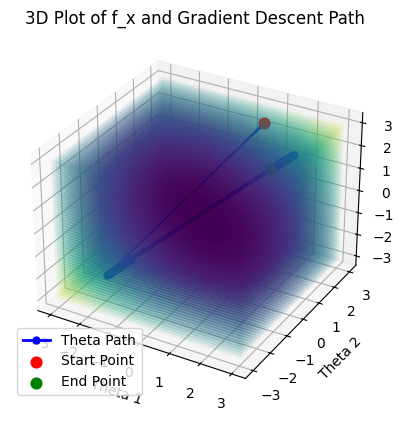

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming the `thetas` array from `calculate_gradient_descent_var` is already available
# and `f_x` function is defined.

# Plot setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a 3D grid for X, Y, and Z
x_vals = np.linspace(-3, 3, 50)
y_vals = np.linspace(-3, 3, 50)
z_vals = np.linspace(-3, 3, 50)
X_grid, Y_grid, Z_grid = np.meshgrid(x_vals, y_vals, z_vals)
F_grid = f_x([X_grid, Y_grid, Z_grid], beta)  # Compute f_x over the grid

# Plot the 3D surface of f_x as a volume
ax.scatter(X_grid, Y_grid, Z_grid, c=F_grid.flatten(), cmap='viridis', alpha=0.05, marker='.')

# Plot the gradient descent path of theta values
thetas = np.array(thetas)  # Convert to numpy array if not already
ax.plot(thetas[:, 0], thetas[:, 1], thetas[:, 2], marker='o', color='blue', markersize=5, label="Theta Path", lw=2)

# Mark the starting and ending points of theta path
ax.scatter(thetas[0, 0], thetas[0, 1], thetas[0, 2], color="red", s=60, label="Start Point")
ax.scatter(thetas[-1, 0], thetas[-1, 1], thetas[-1, 2], color="green", s=60, label="End Point")

# Set labels
ax.set_xlabel("Theta 1")
ax.set_ylabel("Theta 2")
ax.set_zlabel("Theta 3")
ax.set_title("3D Plot of f_x and Gradient Descent Path")

# Add legend
plt.legend()
plt.show()
